# Exercise 1

We consider a database containing the temperature in four corners of a room as a function of time. Each row of the matrix `A` refers to a time and each column represents the temperature in a corner of the room.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://openmv.net/file/room-temperature.csv')
labels = ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']
A = data.to_numpy()[:,1:].astype(np.float64)
A -= 273.15 # from Kelvin to Celsius
```

1. How many samples and features are there in the dataset?
2. Plot the values over time of the temperature in the four corners of the room. From the figure, what can you tell about the potential for dimensionality reduction of the dataset?
3. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of the fraction of the "explained variance":
$$
\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}
$$
4. Print the four principal directions.
5. By using the principal directions computed above, perform dimensionality reduction using only the first `k` principal directions. Repeat the exercise for `k = 1, 2, 3`.
6. Plot the values over time of the temperature in the four corners of the room, obtained from the reconstructions of rank 1, 2 and 3 obtained above.
7. Comment on the results of points 3, 4 and 6.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://openmv.net/file/room-temperature.csv')
labels = ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']
A = data.to_numpy()[:,1:].astype(np.float64)
A -= 273.15 # from Kelvin to Celsius

1. How many samples and features are there in the dataset?


In [3]:
print(f"Number of samples: {A.shape[0]}")
print(f"Number of features: {A.shape[1]}")
print("Data description:")
data.describe()

Number of samples: 144
Number of features: 4
Data description:


,FrontLeft,FrontRight,BackLeft,BackRight
count,144.000000,144.000000,144.00000,144.000000
mean,294.507639,294.628472,295.06250,294.977083
std,1.644532,1.715118,1.58771,1.647533
min,290.200000,291.100000,291.90000,292.100000
25%,293.100000,293.300000,293.67500,293.475000
50%,294.400000,294.400000,295.10000,295.000000
75%,295.800000,295.800000,296.32500,296.500000
max,298.100000,299.000000,297.60000,298.200000


2. Plot the values over time of the temperature in the four corners of the room. From the figure, what can you tell about the potential for dimensionality reduction of the dataset?


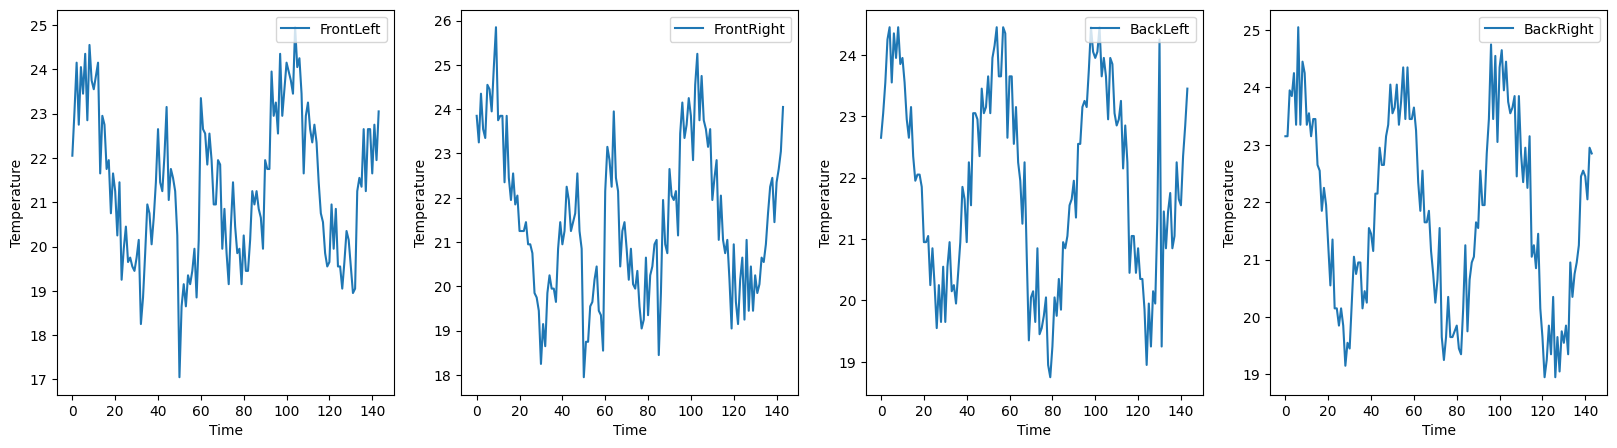

In [4]:
# plot the values over time of the temperature in the four corners of the room

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4):
	ax[i].plot(A[:, i], label=labels[i])
	ax[i].set_xlabel('Time')
	ax[i].set_ylabel('Temperature')
	ax[i].legend(loc='upper right')
plt.show()

### Comment:

From the plot no rigorous conclusion can be drawn, however, it is possible to formulate some reasonable hypothesis. In particular it is evident how all the plots are highly correlated so we can assume the existance of a direction that explain most of the variance. Given that there is high correlation in all features we can expect that the first principal direction will have the same sign for all the features.
Furthermore we can observe how the front pair and the back pair have even stronger inner correlation, this may suggest that also the second principal component is relevant. Given this observation we can expect that front and back pair will have opposite sign in the second principal component.



3. Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of the fraction of the "explained variance":
$$
\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}
$$

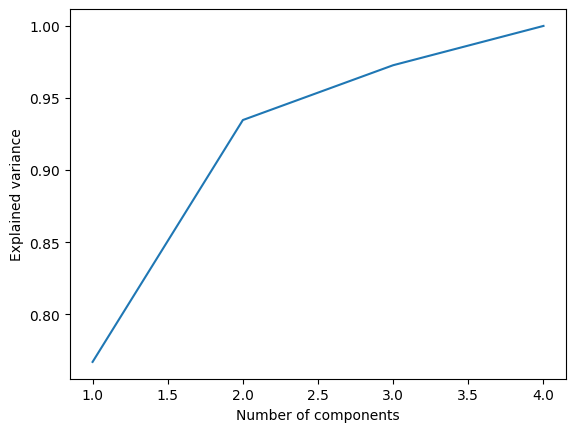

In [5]:
# Center the data
A_centered = A - A.mean(axis=0)[None, :]
U, S, Vt = np.linalg.svd(A_centered, full_matrices=False)
explained_variance = np.cumsum(S**2) / np.sum(S**2)
plt.plot([1,2,3,4],explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

4. Print the four principal directions.


In [6]:
for i in range(4):
	print(f"Principal direction {i+1}: {Vt[i]}")

Principal direction 1: [-0.49391128 -0.52817872 -0.46980861 -0.50631883]
Principal direction 2: [-0.50203076 -0.47304176  0.54077759  0.48141065]
Principal direction 3: [ 0.70984479 -0.70076399  0.06702403 -0.02362183]
Principal direction 4: [ 0.01171101 -0.07866743 -0.69451224  0.71507135]


5. By using the principal directions computed above, perform dimensionality reduction using only the first `k` principal directions. Repeat the exercise for `k = 1, 2, 3`.
6. Plot the values over time of the temperature in the four corners of the room, obtained from the reconstructions of rank 1, 2 and 3 obtained above.



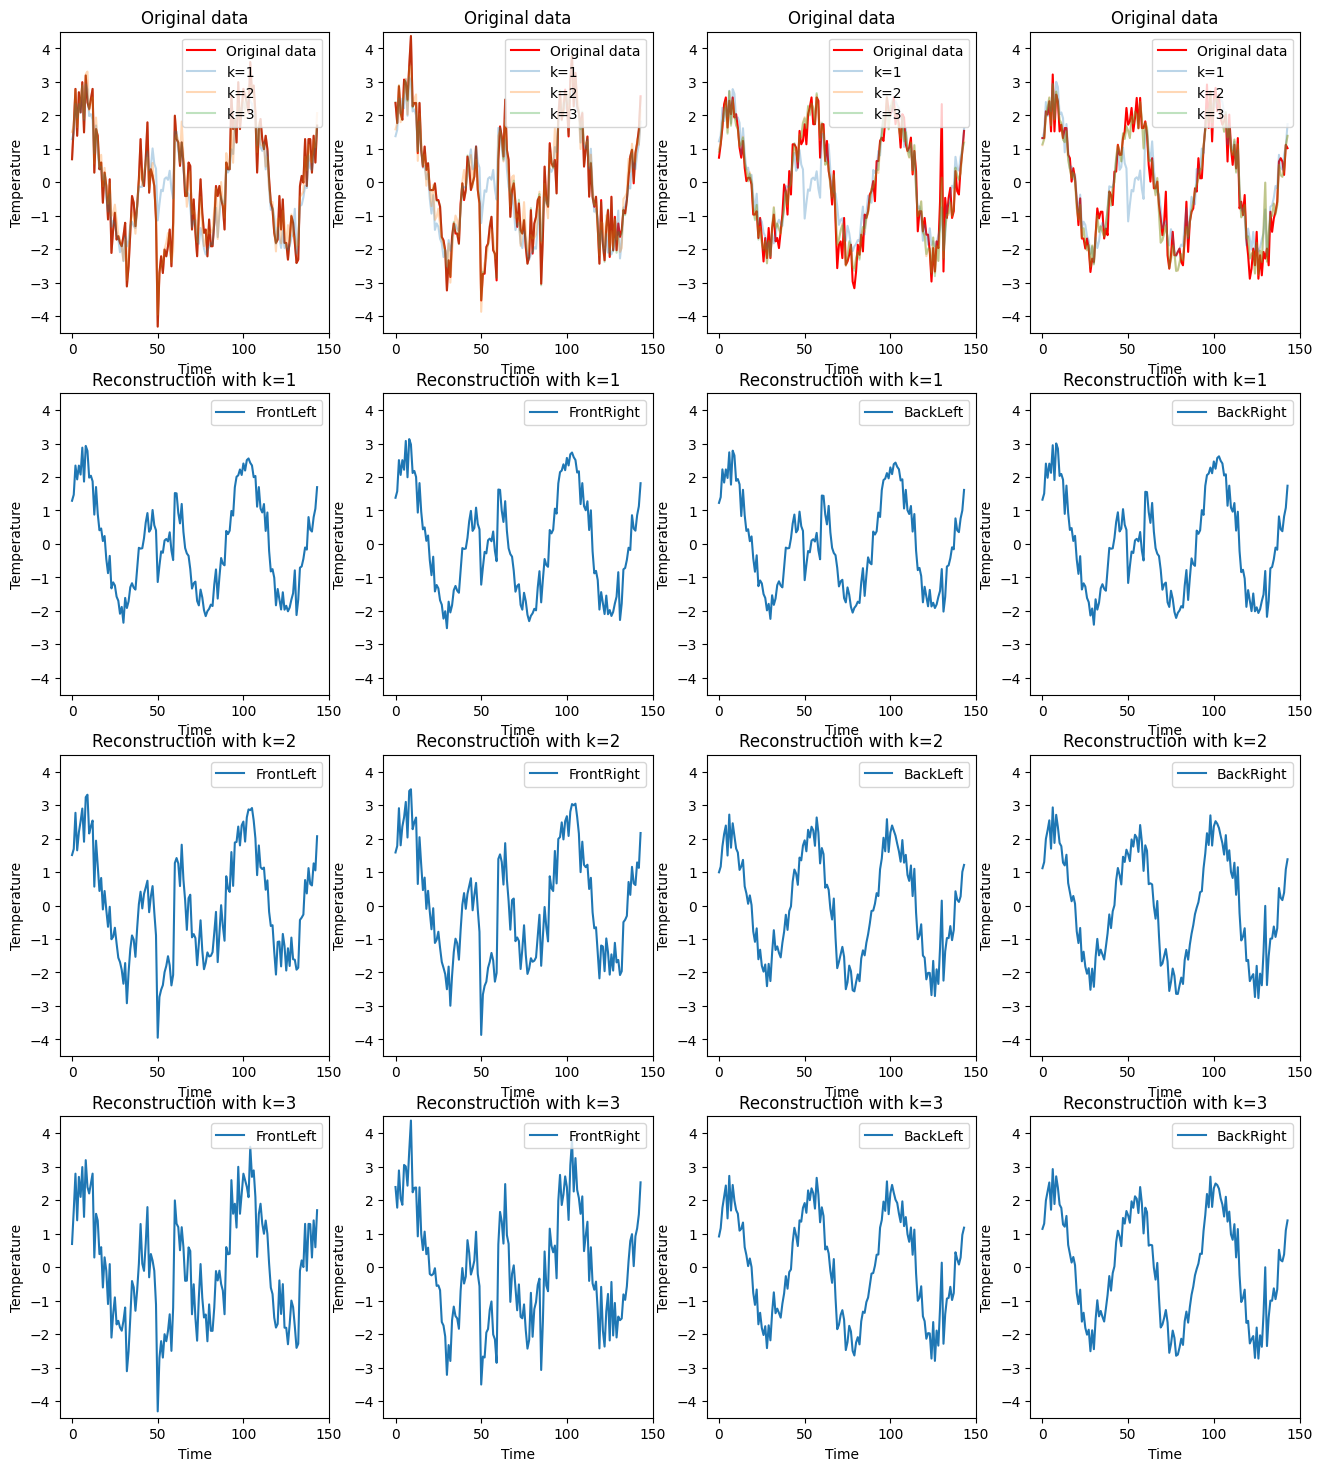

In [7]:
ks = [1, 2, 3]

fig, ax = plt.subplots(4, 4, figsize=(16, 18))
for k in ks:
	A_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
	for i in range(4):
		ax[k, i].plot(A_k[:, i], label=labels[i])
		ax[k, i].set_xlabel('Time')
		ax[k, i].set_ylabel('Temperature')
		ax[k, i].legend(loc='upper right')
		ax[k, i].set_title(f'Reconstruction with k={k}')
		ax[k, i].set_ylim(-4.5, 4.5)

for i in range(4):
	ax[0, i].plot(A_centered[:, i], label="Original data", c="r")
	for k in ks:
		A_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
		ax[0, i].plot(A_k[:, i], label=f"k={k}", alpha=0.3)
	ax[0, i].set_xlabel('Time')
	ax[0, i].set_ylabel('Temperature')
	ax[0, i].legend(loc='upper right')
	ax[0, i].set_title('Original data')
	ax[0, i].set_ylim(-4.5, 4.5)
plt.show()

7. Comment on the results of points 3, 4 and 6.

### Comment:

The hypothesis formulated at point 2 are confirmed by the results. In particular:
- From point 3 we can see how the first principal direction captures a correlation common to all features, while the second principal direction captures the difference between front and back pair. Furthermore we can see how the third principal direction captures the difference between left and right pair.
- From point 4 we can see that the first principal direction is clearly explaining most of the variance in the data (>75%). The second principal direction is also much more relevant than the third and fourth explaining almost 20% of the variance.
- From point 6 we can see how the reconstruction of the data using the first principal direction captures the common trend in the data, when using the second principal direction we can see how the difference between front and back pair is captured. Finally the third and fourth directions just capture some details in the data.


---

# Exercise 2

Consider the Boston dataset contained in scikit-learn:

```python
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load the Boston housing dataset.
X_boston, y_boston = load_boston(return_X_y=True)

# Split into 60% training, 20% validation and 20% test.
X_boston_tr, X_rest, y_boston_tr, y_rest = train_test_split(X_boston, y_boston, test_size=0.4, random_state=0)
X_boston_val, X_boston_te, y_boston_val, y_boston_te = train_test_split(X_rest, y_rest, test_size=0.5, random_state=0)
```

1. Implement the analytical solution of ridge regression $(X^T X + \alpha I)w = X^T y$ using `scipy.linalg.solve`. Compute the solution on the training data. Make sure that the gradient at the solution is zero (up to machine precision).

2. Train the models for several possible values of alpha (`alphas = np.logspace(-3, 3, 20)`). Plot the mean squared error on the test set as a function of alpha. Use the validation data to find the best alpha and display it on the graph.

3. Consider the scaled version of the Boston dataset:

```python
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_boston)
y = y_boston - y_boston.mean()
y /= np.std(y_boston)
```

Write a function that computes the stochastic gradient of ridge regression:

$$ J(w) = \frac{1}{n} \|y - Xw\|^2 + \frac{\alpha}{2} \|w\|^2 $$

Check that the mean of the stochastic gradient gives the gradient.

4. Write a function that implements stochastic gradient descent. Implement two rules for sampling the index: cyclic, and at random. Compare the convergence of both algorithms using the value of alpha found at point 2. What is the role of the step size?


### Note:

The dataset was removed from sklearn (after version 1.2) due to moral concerns about its content (racisms).

By running the cell below you can download the dataset from kaggle.

In [8]:
!curl -L -o ./boston-house-prices.zip https://www.kaggle.com/api/v1/datasets/download/vikrishnan/boston-house-prices
!unzip -o ./boston-house-prices.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 13146  100 13146    0     0   5621      0  0:00:02  0:00:02 --:--:--  5621
Archive:  ./boston-house-prices.zip
  inflating: housing.csv             


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Actually load the data
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=features) 
X_boston = data.drop('MEDV', axis=1).values
y_boston = data['MEDV'].values

# Split into 60% training, 20% validation and 20% test.
X_boston_tr, X_rest, y_boston_tr, y_rest = train_test_split(X_boston, y_boston, test_size=0.4, random_state=0)
X_boston_val, X_boston_te, y_boston_val, y_boston_te = train_test_split(X_rest, y_rest, test_size=0.5, random_state=0)


/tmp/ipykernel_193679/3692010921.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=features)


In [10]:
print(f"Training data: {X_boston_tr.shape[0]} samples, {X_boston_tr.shape[1]} features")
print(f"Validation data: {X_boston_val.shape[0]} samples, {X_boston_val.shape[1]} features")
print(f"Test data: {X_boston_te.shape[0]} samples, {X_boston_te.shape[1]} features")
data.describe()

Training data: 303 samples, 13 features
Validation data: 101 samples, 13 features
Test data: 102 samples, 13 features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. Implement the analytical solution of ridge regression $(X^T X + \alpha I)w = X^T y$ using `scipy.linalg.solve`. Compute the solution on the training data. Make sure that the gradient at the solution is zero (up to machine precision).


In [28]:
import jax
import jax.numpy as jnp

def analytical_ridge_regression(X, y, alpha):
	n, m = X.shape
	A = X.T @ X + alpha * np.eye(m)
	b = X.T @ y
	w = np.linalg.solve(A, b)
	return w

def linear_model(X, w):
	return X @ w

def mse(y_true, X, w):
	return 0.5*np.mean((y_true - X@w)**2)

def grad_mse(y_true, y_pred):
	return X_boston_tr.T @ (y_true - y_pred) / y_true.size


weights_analytical = analytical_ridge_regression(X_boston_tr, y_boston_tr, 1e-12)
y_pred = linear_model(X_boston_tr, weights_analytical)

# Check that the gradient is zero
print(grad_mse(y_boston_tr, y_pred))
print(jax.grad(mse, argnums=2)(y_boston_tr, X_boston_tr, weights_analytical))

[ 4.13713801e-15 -1.87226838e-13  4.06070483e-13  4.39692287e-16
  5.65004589e-16 -8.31311551e-15  2.00921787e-13 -1.67024443e-14
  1.61947463e-13  8.74450640e-12  4.97075062e-13  2.92959349e-12
 -2.59125321e-14]
[-5.25462974e-06 -1.92318112e-05 -1.94382264e-05 -2.16998160e-07
 -9.11676921e-07 -1.04068449e-05 -1.14168506e-04 -6.13238399e-06
 -1.70608982e-05 -6.91436231e-04 -3.10864052e-05 -5.90593670e-04
 -1.97622903e-05]


2. Train the models for several possible values of alpha (`alphas = np.logspace(-3, 3, 20)`). Plot the mean squared error on the test set as a function of alpha. Use the validation data to find the best alpha and display it on the graph.


Best alpha: 26.366508987303554


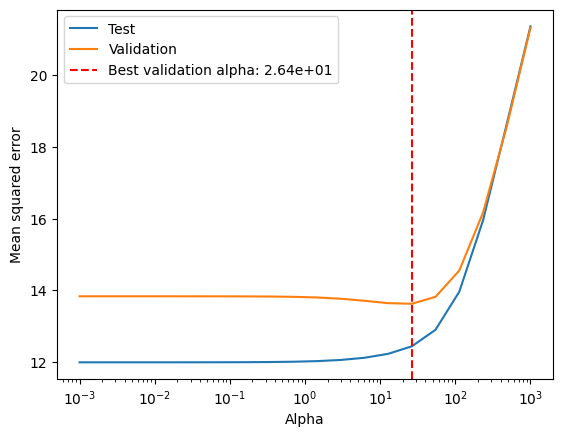

In [16]:
alphas = np.logspace(-3, 3, 20)

mse_val = []
mse_test = []

for alpha in alphas:
	weights = analytical_ridge_regression(X_boston_tr, y_boston_tr, alpha)
	y_pred = linear_model(X_boston_val, weights)
	mse_val.append(mse(y_boston_val, X_boston_val, weights))

	# Evaluate the model on the test set
	y_pred = linear_model(X_boston_te, weights)
	mse_test.append(mse(y_boston_te, X_boston_te, weights))


best_alpha = alphas[np.argmin(mse_val)]
print(f"Best alpha: {best_alpha}")

plt.plot(alphas, mse_test, label='Test')
plt.plot(alphas, mse_val, label='Validation')
plt.axvline(best_alpha, color='r', linestyle='--', label=f"Best validation alpha: {best_alpha:.2e}")
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.legend()




3. Consider the scaled version of the Boston dataset:

```python
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_boston)
y = y_boston - y_boston.mean()
y /= np.std(y_boston)
```

Write a function that computes the stochastic gradient of ridge regression:

$$ J(w) = \frac{1}{n} \|y - Xw\|^2 + \frac{\alpha}{2} \|w\|^2 $$

Check that the mean of the stochastic gradient gives the gradient.


In [51]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X_boston)
y = y_boston - y_boston.mean()
y /= np.std(y_boston)

def loss(w, X, y, alpha):
	return np.mean((y - X @ w)**2) + 0.5 * alpha * np.linalg.norm(w)**2

def stochastic_grad_ridge_regression(w, X, y, alpha):
	index = np.random.randint(0, y.size)
	x_i = X[index]
	y_i = y[index]
	grad = -2 * x_i * (y_i - x_i @ w) + alpha * w
	return grad


4. Write a function that implements stochastic gradient descent. Implement two rules for sampling the index: cyclic, and at random. Compare the convergence of both algorithms using the value of alpha found at point 2. What is the role of the step size?


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

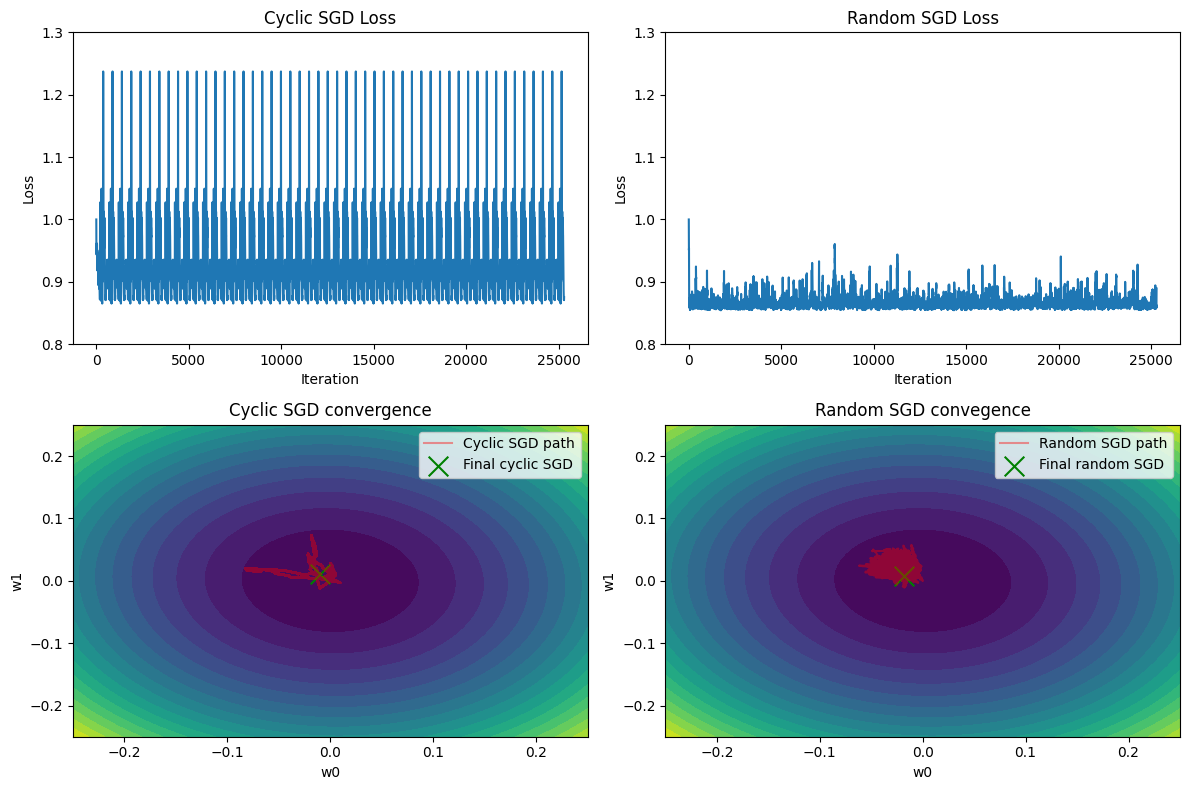

In [60]:
from tqdm.notebook import tqdm

def sgd_cyclic(X, y, alpha, n_epochs=100, learning_rate=1e-3):
	w = np.zeros(X.shape[1])
	weights = [w]
	losses = [loss(w, X, y, alpha)]
	for epoch in tqdm(range(n_epochs)):
		for i in range(y.size):
			grad = -2 * X[i] * (y[i] - X[i] @ w) + alpha * w
			w = w - learning_rate * grad
			weights.append(w)
			losses.append(loss(w, X, y, alpha))
	return w, weights, losses

def sgd_random(X, y, alpha, n_epochs=100, learning_rate=1e-3):
	w = np.zeros(X.shape[1])
	weights = [w]
	losses = [loss(w, X, y, alpha)]
	for epoch in tqdm(range(n_epochs)):
		for i in range(y.size):
			grad = stochastic_grad_ridge_regression(w, X, y, alpha)
			w = w - learning_rate * grad
			weights.append(w)
			losses.append(loss(w, X, y, alpha))
	return w, weights, losses


w_cyclic, weights_cyclic, losses_cyclic = sgd_cyclic(X, y, best_alpha, n_epochs=50, learning_rate=1e-3)
w_random, weights_random, losses_random = sgd_random(X, y, best_alpha, n_epochs=50, learning_rate=1e-3)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0, 0].plot(losses_cyclic)
ax[0, 0].set_title('Cyclic SGD Loss')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].set_xlabel('Iteration')
ax[0, 0].set_ylim(0.8, 1.3)
ax[0, 1].plot(losses_random)
ax[0, 1].set_title('Random SGD Loss')
ax[0, 1].set_ylabel('Loss')
ax[0, 1].set_xlabel('Iteration')
ax[0, 1].set_ylim(0.8, 1.3)

xx, yy = np.meshgrid(np.linspace(-0.25, 0.25, 100), np.linspace(-0.25, 0.25, 100))
zz = np.array([loss(np.array([x, y, 0,0,0,0,0,0,0,0,0,0,0]), X[:2], y, best_alpha) for x, y in zip(xx.ravel(), yy.ravel())]).reshape(xx.shape)
ax[1, 0].contourf(xx, yy, zz, levels=20)
ax[1, 0].plot([w[0] for w in weights_cyclic], [w[1] for w in weights_cyclic], c='r', alpha=0.4, label='Cyclic SGD path')
ax[1, 0].scatter([w_cyclic[0]], [w_cyclic[1]], c='g', label='Final cyclic SGD', s=200, marker='x')
ax[1, 0].set_title('Cyclic SGD convergence')
ax[1, 0].set_xlabel('w0')
ax[1, 0].set_ylabel('w1')
ax[1, 0].set_xlim(-0.25, 0.25)
ax[1, 0].set_ylim(-0.25, 0.25)
ax[1, 0].legend()

ax[1, 1].contourf(xx, yy, zz, levels=20)
ax[1, 1].plot([w[0] for w in weights_random], [w[1] for w in weights_random], c='r', alpha=0.4, label='Random SGD path')
ax[1, 1].scatter([w_random[0]], [w_random[1]], c='g', label='Final random SGD', s=200, marker='x')
ax[1, 1].set_title('Random SGD convegence')
ax[1, 1].set_xlabel('w0')
ax[1, 1].set_ylabel('w1')
ax[1, 1].set_xlim(-0.25, 0.25)
ax[1, 1].set_ylim(-0.25, 0.25)
ax[1, 1].legend()
plt.tight_layout()



### Comment:

- The cyclic sampling is reflected in a cyclic behaviour of the converge of the gradient descent. This is due to the fact that the gradient is computed on the same subset of the data at each iteration. This behaviour is not present in the random sampling, where the gradient is computed on a different subset of the data at each iteration. This is reflected in a less predictable behaviour which is however more stable and converges faster.
- The learning rate impact on the convergence speed and on the behaviour of SGD. If the learning rate is too high the algorithm may not converge, if it is too low the algorithm may converge too slowly. In a non-extreme case the learning rate impacts the stability of the algorithm increasing or decreasing the region of confusion around the minimum (smaller when lr is small).


---

<div style="text-align: center">
<img src="3_text.png" width="80%"> 
</div>

### Solution:

<div style="text-align: center">
<img src="3_solution.png" width="80%">
</div>